# Project: - Investigating TMDb Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

The TMDb Movies data is a dataset containing information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue from 1960 to 2015. From this data, we will try to answer these questions

### Questions

#1 Which genre is common amongst the most popular movies over the years?

#2 Which genres are associated with high budgets?. Do they come with high revenue and profits?

#3 Did any genre record a loss over the years? And by how much? 

#4 The higher the popularity of a genre, the higher the profit?

#5 What are the features of  popular movies in terms of budget, revenue, and profit?

#6 Which production companies are among the top 10 movie producers of popular movies?

#7 Which production companies are the overall top 10 movie producers and how many movies have they produced over the years?

#8 How many production companies have produced 5 or less movies over the years?



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score

# Data Wrangling

In [2]:
#load the data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# check the dypes of columns , number of entries and if some rows have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#selecting necessary columns to explore and answer questions
columns_to_keep = ['id', 'popularity', 'budget','revenue','cast','director','runtime','genres','production_companies','vote_count','vote_average','release_year','budget_adj','revenue_adj']
df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


## Data Cleaning (Drop rows with missing column values and remove duplicated rows if any )

In [5]:
#checking for duplicates
df.duplicated().sum()

1

In [6]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [7]:
#drop row with nan column values
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   vote_count            9772 non-null   int64  
 10  vote_average          9772 non-null   float64
 11  release_year          9772 non-null   int64  
 12  budget_adj            9772 non-null   float64
 13  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.shape

(9772, 14)

In [10]:
#calculate the profit from each movie
df['profit'] = (df.revenue - df.budget).values
df['profit_adj'] = (df.revenue_adj - df.budget_adj).values
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


# Exploratory Data Analysis

### #1 Which genre is common amongst the most popular movies over the years?

In [11]:
#creating new dataframe with genres splitted
new_df = pd.DataFrame(columns = list(df.columns))      

for genre, index in zip(df.genres, df.index):
    for s in genre.split('|'):
        temp_df = df.copy().loc[index:index, :]
        temp_df.genres = temp_df.loc[index: index,:].genres.apply(lambda x: s)
        new_df = pd.concat([new_df,temp_df ])

In [12]:
new_df.shape

(24650, 16)

In [13]:
figsize = (15,15)

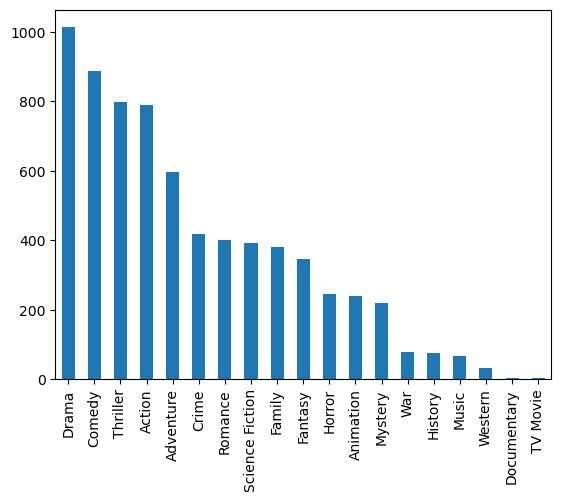

In [14]:
pop_df = new_df.query('popularity >= popularity.mean()')

pop_df.genres.value_counts().plot(kind = 'bar');

### #2 Which genres are associated with high budgets?. Do they come with high revenue and profits?

,budget,revenue,profit
genres,,,
Adventure,3.981309e+07,1.201717e+08,8.035860e+07
Fantasy,3.551363e+07,1.050024e+08,6.948878e+07
Action,2.946214e+07,7.759165e+07,4.812951e+07
Science Fiction,2.698842e+07,7.586805e+07,4.887963e+07
Animation,2.617218e+07,8.517872e+07,5.900653e+07
Family,2.610785e+07,8.129599e+07,5.518814e+07
War,2.170701e+07,4.981938e+07,2.811237e+07
History,2.007736e+07,3.493070e+07,1.485333e+07
Western,1.956705e+07,2.946148e+07,9.894433e+06


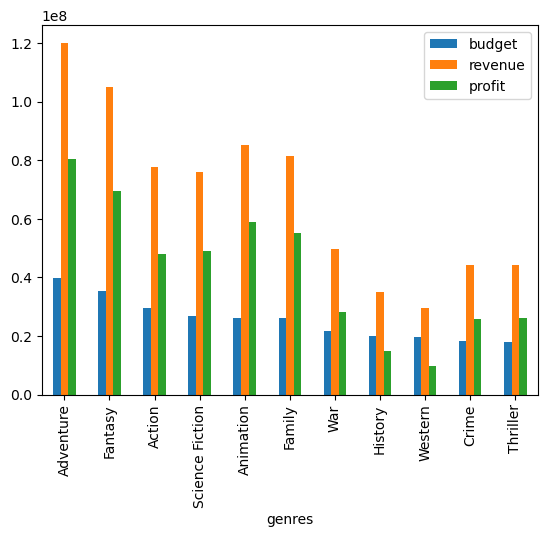

In [44]:
#Use the aggregate mean to study the trends
_2 = new_df.groupby('genres')[['budget','revenue','profit']].mean().sort_values(by='budget', ascending = 0)
_2.query('budget >= budget.mean()').plot(kind = 'bar');
_2


### #3 Did any genre record a loss over the years? And by how much?

In [39]:
loss = _2.query('profit < 0')
loss

,budget,revenue,profit
genres,,,
Foreign,1.989543e+06,1.482569e+06,-506974.650000
TV Movie,3.386364e+05,3.181818e+05,-20454.545455


<AxesSubplot:xlabel='genres'>

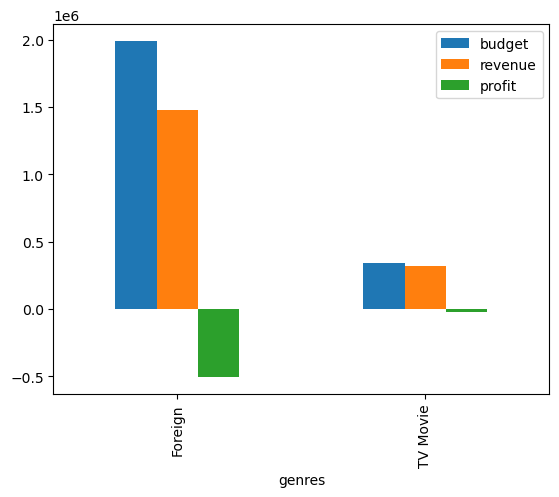

In [17]:
loss.plot(kind = 'bar')

### #4 The higher the popularity of a genre, the higher the profit?

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24650 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24650 non-null  object 
 1   popularity            24650 non-null  float64
 2   budget                24650 non-null  object 
 3   revenue               24650 non-null  object 
 4   cast                  24650 non-null  object 
 5   director              24650 non-null  object 
 6   runtime               24650 non-null  object 
 7   genres                24650 non-null  object 
 8   production_companies  24650 non-null  object 
 9   vote_count            24650 non-null  object 
 10  vote_average          24650 non-null  float64
 11  release_year          24650 non-null  object 
 12  budget_adj            24650 non-null  float64
 13  revenue_adj           24650 non-null  float64
 14  profit                24650 non-null  object 
 15  profit_adj         

In [27]:
#convert object columns back into workable columns
new_df[['budget','revenue','vote_count','profit']] = new_df[['budget','revenue','vote_count','profit']].applymap(lambda x: float(x))

In [28]:
new_df['runtime'] = new_df['runtime'].apply(lambda x: int(x))

The r square is 0.8145337217746712


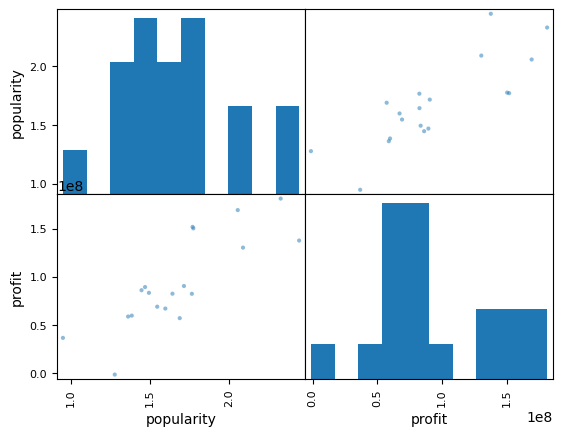

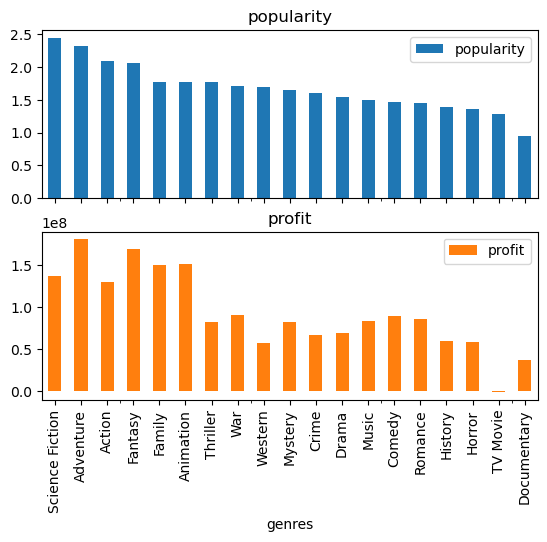

In [55]:
#plot the findings to make it easier to study
h_df=  new_df.query('popularity >= popularity.mean()').groupby('genres')[['popularity', 'profit']].mean().sort_values(by= 'popularity',ascending = 0);

pd.plotting.scatter_matrix(h_df);

h_df.plot.bar(subplots = True);

print('The r square is {}'.format(h_df.profit.corr(h_df.popularity)))

### #5 What are the features of popular movies in terms of budget, revenue, and profit year on year?

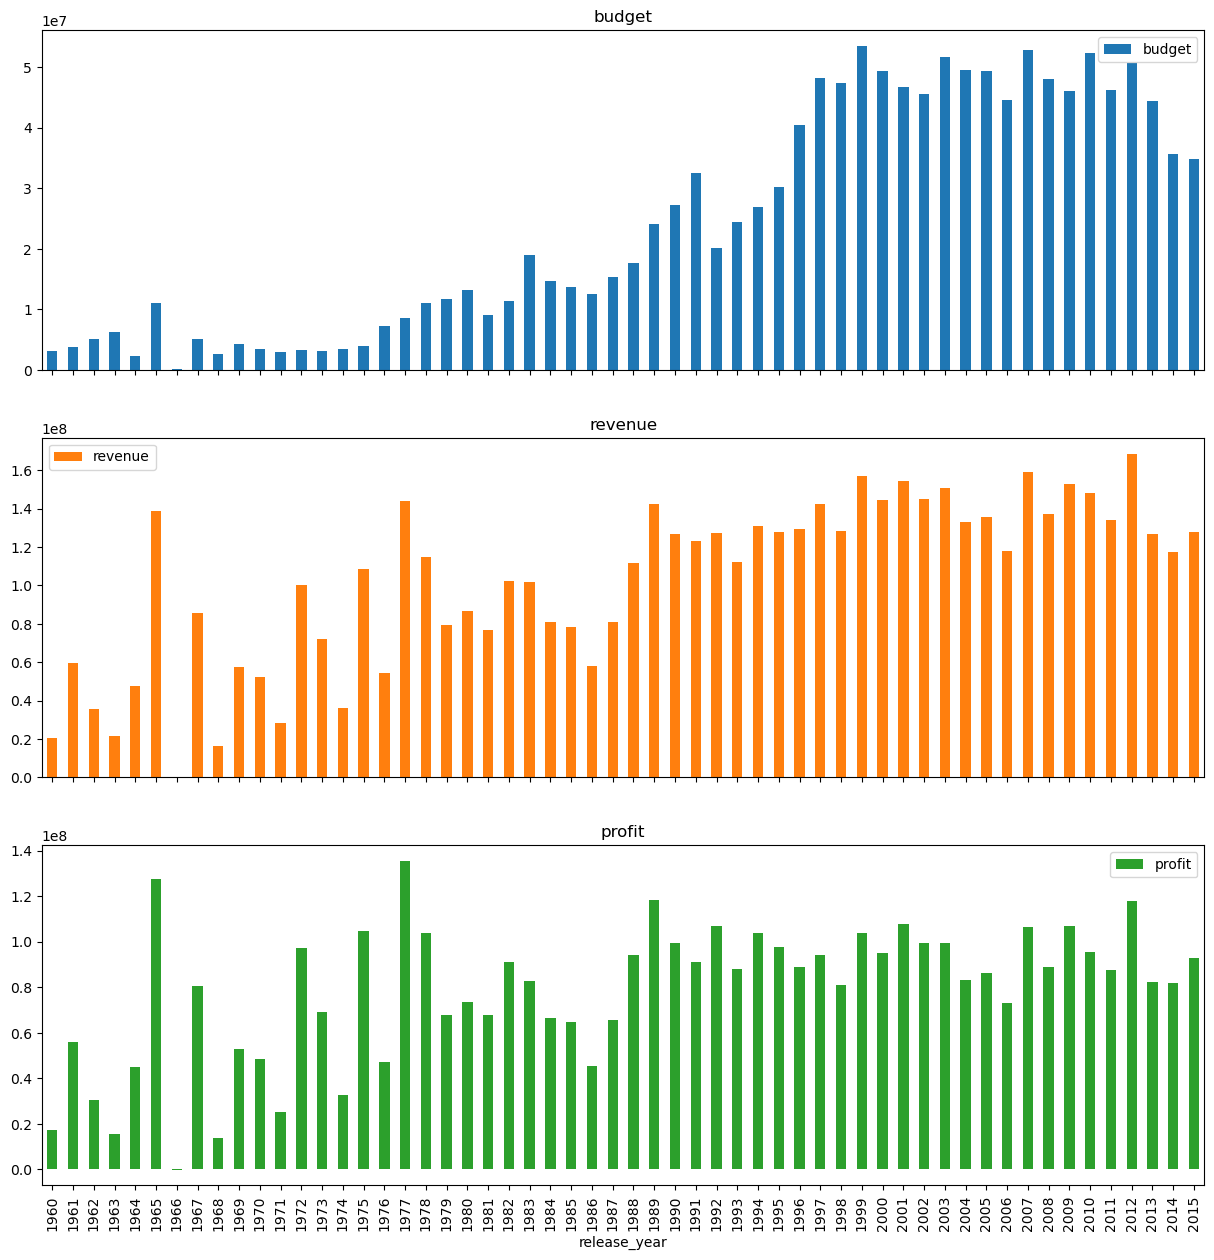

In [41]:
df.query('popularity >= popularity.mean()').groupby('release_year')[['budget','revenue','profit']].mean().plot.bar(subplots= True, figsize= figsize);

### #5 What are the features of popular movies in terms of budget, revenue, and profit in the last five years? 


In [23]:
last_5 = df.query('popularity >= popularity.mean()').groupby('release_year')[['budget','revenue','profit']].mean().loc['2010':'2015',:]

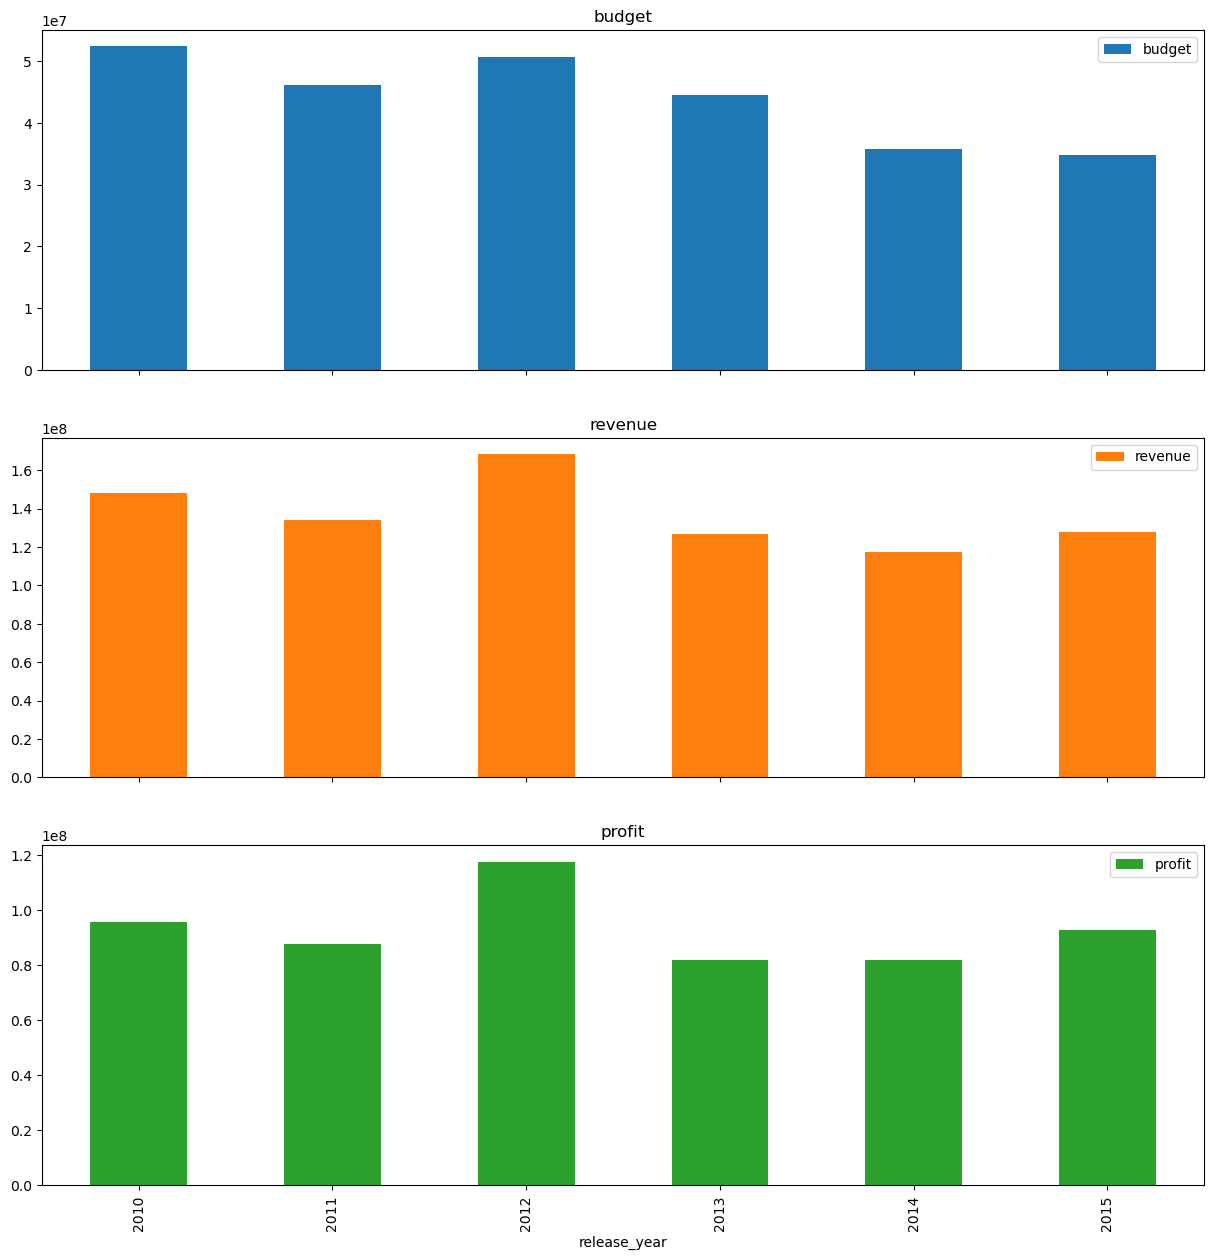

In [24]:
last_5.plot.bar(subplots= True, figsize = figsize);

In [25]:
last_5.describe()

,budget,revenue,profit
count,6.000000e+00,6.000000e+00,6.000000e+00
mean,4.405539e+07,1.370611e+08,9.300571e+07
std,7.408022e+06,1.841439e+07,1.334775e+07
min,3.476937e+07,1.176607e+08,8.192396e+07
25%,3.792712e+07,1.268340e+08,8.350223e+07
50%,4.535020e+07,1.307717e+08,9.028592e+07
75%,4.958775e+07,1.445473e+08,9.495540e+07
max,5.240954e+07,1.685018e+08,1.177856e+08


### #6 Which production companies are among the top 10 movie producers of popular movies?



In [30]:
#Creating new dataframe with production companies splitted
prod_df = pd.DataFrame(columns = list(df.columns))      

for comp, index in zip(df.production_companies, df.index):
    for s in comp.split('|'):
        temp_df = df.copy().loc[index:index, :]
        temp_df.production_companies = temp_df.loc[index: index,:].production_companies.apply(lambda x: s)
        prod_df = pd.concat([prod_df,temp_df ])

In [31]:
prod_df.head(1)

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09


In [32]:
prod_df.shape

(23143, 16)

In [33]:
top_10_pop = prod_df.query('popularity >= popularity.mean()').production_companies.value_counts().sort_values(ascending = False)[:11]
top_10_pop

Warner Bros.                              221
Universal Pictures                        210
Paramount Pictures                        154
Twentieth Century Fox Film Corporation    138
Columbia Pictures                         113
Walt Disney Pictures                      108
New Line Cinema                            96
Relativity Media                           80
Metro-Goldwyn-Mayer (MGM)                  67
Columbia Pictures Corporation              57
Touchstone Pictures                        57
Name: production_companies, dtype: int64

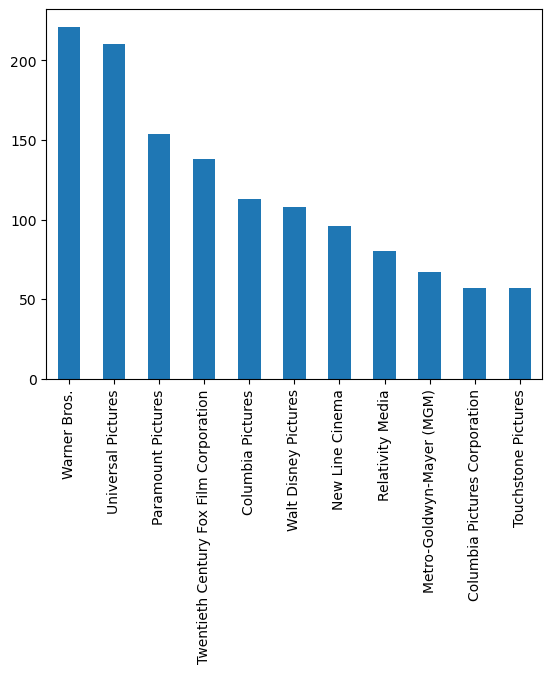

In [34]:
top_10_pop.plot.bar();

### #7 Which production companies are the overall top 10 movie producers and how many movies have they produced over the years?

In [57]:
top_10 = prod_df.production_companies.value_counts().sort_values(ascending = False)[:11]
top_10

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Name: production_companies, dtype: int64

<AxesSubplot:>

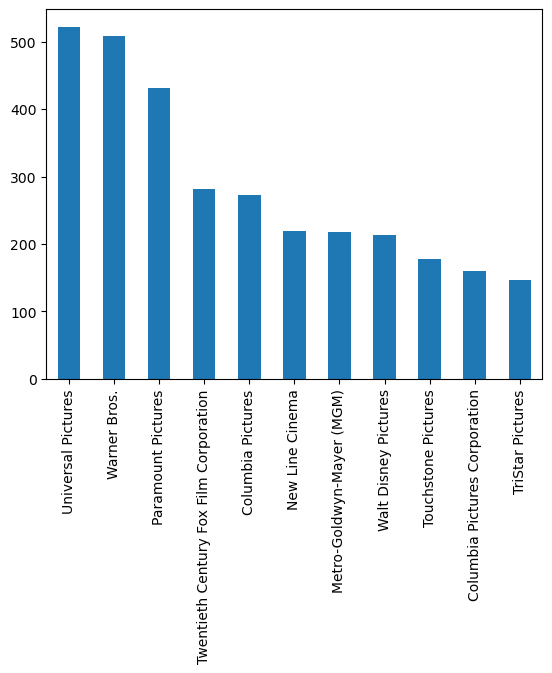

In [36]:
top_10.plot.bar()

### #8  How many production companies have produced 5 or less movies over the years?


In [37]:
_5less = prod_df.production_companies.value_counts()
_5less = _5less.where(_5less <= 5).dropna()

In [42]:
_5less.size

7187

## Conclusions

### #1 Which genre is common amongst the most popular movies over the years?
___________________________________________________________________________________________

# Ans: From 1960 to 2015, The most common genre in the popular movies is Drama and the least common is TV Movie.

### #2 Which genres are associated with high budgets?. Do they come with high revenue and profits?
___________________________________________________________________________________________________________________

# Ans: Adeventure, Fantansy, Action, Animation, Family, War, Western, Crime, Thriller, History, Science Fiction are the genres with high budgets and they all have high revenues and profits

### #3 Did any genre record a loss over the years? And by how much?
_____________________________________________________________________________________

# Ans: Yes, Foreign Movies recorded a loss of USD -506974.650   and TV Movie recorded a loss of USD -20454.55 approximately

### #4 The higher the popularity of a genre, the higher the profit?
__________________________________________________________________________________

# ANS: Yes, there is a positive correlation between popularity and profit. That is, the higher the popularity, the higher the profit. And with an R-square of 0.8145, The relationship is a strong positve relationship.

### #5 What are the features of popular movies in terms of budget, revenue, and profit?
_________________________________________________________________________________________________

# ANS: By rule of thumb, from the observation of the bar charts, each year the higher the budget, the higher the revenue and profit

### #6  Which production companies are among the top 10 movie producers of popular movies?
___________________________________________________________________________________________________________

# ANS: Warner Bros, Universal Pictures, Paramount Pictures ,Twentieth Century Fox Film Corporation, Columbia Pictures, Walt Disney Pictures, New Line Cinema, Relativity Media, Metro-Goldwyn-Mayer (MGM), Columbia Pictures Corporation, Touchstone Pictures in their respective order

### #7 Which production companies are the overall top 10 movie producers and how many movies have they produced over the years?
_________________________________________________________________________________________________________________________

# ANS:'Universal Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures',New Line Cinema', 'Metro-Goldwyn-Mayer (MGM)', 'Walt Disney Pictures','Touchstone Pictures', 'Columbia Pictures Corporation','TriStar Pictures'  in their respective order

### #8 How many production companies have produced 5 or less movies over the years?
_____________________________________________________________________________________________________

# ANS: 7187 production companies have produced five movie or less from1960 to 2015